# 对数据集进行统计分析

In [10]:
from datasets import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns
from transformers import AutoTokenizer

In [3]:
raw_datasets = load_dataset("glue", "qnli")

Reusing dataset glue (/home/wh/.cache/huggingface/datasets/glue/qnli/1.0.0/dacbe3125aa31d7f70367a07a8a9e72a5a0bfeb5fc42e75c9db75b96da6053ad)


  0%|          | 0/3 [00:00<?, ?it/s]

In [4]:
raw_datasets

DatasetDict({
    train: Dataset({
        features: ['question', 'sentence', 'label', 'idx'],
        num_rows: 104743
    })
    validation: Dataset({
        features: ['question', 'sentence', 'label', 'idx'],
        num_rows: 5463
    })
    test: Dataset({
        features: ['question', 'sentence', 'label', 'idx'],
        num_rows: 5463
    })
})

In [9]:
raw_datasets["train"].features

{'question': Value(dtype='string', id=None),
 'sentence': Value(dtype='string', id=None),
 'label': ClassLabel(num_classes=2, names=['entailment', 'not_entailment'], id=None),
 'idx': Value(dtype='int32', id=None)}

## 统计句子长度分布

In [12]:
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

In [15]:
question_token_count = []

for example in raw_datasets["train"]:
    question_token_count.append(len(tokenizer.tokenize(example["question"])))

print(len(question_token_count))

104743


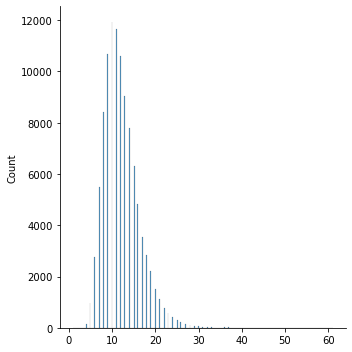

In [18]:
sns.displot(question_token_count)

In [22]:
sentence_token_count = []
for example in raw_datasets["train"]:
    sentence_token_count.append(len(tokenizer.tokenize(example["sentence"], )))
    # 截断到128
    if sentence_token_count[-1] > 128:
        sentence_token_count[-1] = 128
len(sentence_token_count)

104743

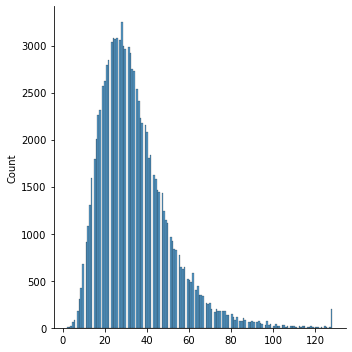

In [23]:
sns.displot(sentence_token_count)

In [25]:
raw_datasets = load_dataset("glue", "wnli")
train_dataset = raw_datasets["train"]

Reusing dataset glue (/home/wh/.cache/huggingface/datasets/glue/wnli/1.0.0/dacbe3125aa31d7f70367a07a8a9e72a5a0bfeb5fc42e75c9db75b96da6053ad)


  0%|          | 0/3 [00:00<?, ?it/s]

In [31]:
len(train_dataset)

635

In [32]:
train_dataset.features

{'sentence1': Value(dtype='string', id=None),
 'sentence2': Value(dtype='string', id=None),
 'label': ClassLabel(num_classes=2, names=['not_entailment', 'entailment'], id=None),
 'idx': Value(dtype='int32', id=None)}

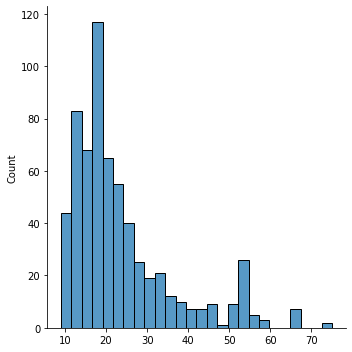

In [38]:
sentence1_token_count = []
for example in train_dataset:
    sentence1_token_count.append(len(tokenizer.tokenize(example["sentence1"])))
sns.displot(sentence1_token_count)

In [39]:
import numpy as np

np.mean(sentence1_token_count)

23.776377952755904

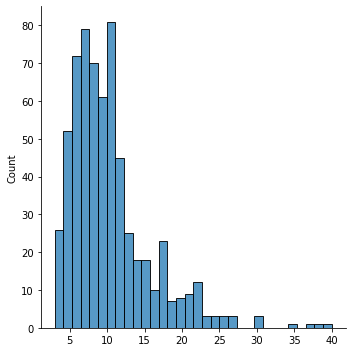

In [37]:
sentence2_token_count = []
for example in train_dataset:
    sentence2_token_count.append(len(tokenizer.tokenize(example["sentence2"])))
sns.displot(sentence2_token_count)

In [40]:
np.mean(sentence2_token_count)

10.292913385826772